Christian Hansen  
Exploring Homelessness for CTA  
June 9th, 2017

In [ ]:
ls

# Building a tree classifier and seeing if any features contribute to placement based on segments of the population that are in certain programs/projects

In [4]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets.samples_generator import make_swiss_roll
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
import seaborn

In [6]:
df_features = pd.read_csv('../processed/2017-01-22_homeless_summary_categorical_numeric.csv')

In [7]:
Projects = [u'project_type_code_emergencyshelter',
       u'project_type_code_homelessnessprevention', u'project_type_code_other',
       u'project_type_code_permanentsupportivehousing',
       u'project_type_code_rapidrehousing', u'project_type_code_servicesonly',
       u'project_type_code_streetoutreach',
       u'project_type_code_transitionalhousing']

In [8]:
df_features.shape

(11362, 97)

In [9]:
df_features.head()

,Personal ID,chronic_homeless,client_age_at_entry,continuously_homeless_one_year,days_enrolled,days_to_residential_move_in,disabling_condition,domestic_violence_victim,dv_currently_fleeing,enrollments,...,disability_type_alcoholdrug,disability_type_developmental,disability_type_substance,disability_type_physical,disability_type_chronichealth,disability_type_hearing,disability_type_alcohol,disability_type_vision,disability_type_drug,disability_type_mentalhealth
0,173781,0,35,0,147,NaN,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,173782,0,10,1,147,NaN,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173783,0,12,1,147,NaN,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,173803,0,32,0,78,NaN,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173804,0,11,0,78,NaN,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_features.columns

Index([u'Personal ID', u'chronic_homeless', u'client_age_at_entry',
       u'continuously_homeless_one_year', u'days_enrolled',
       u'days_to_residential_move_in', u'disabling_condition',
       u'domestic_violence_victim', u'dv_currently_fleeing', u'enrollments',
       u'ethnicity_latino', u'ethnicity_nonlatino', u'ethnicity_unknown',
       u'gender_female', u'gender_male', u'gender_unknown',
       u'head_of_household', u'housing_status_project_start_atrisk',
       u'housing_status_project_start_cat1homeless',
       u'housing_status_project_start_cat2risklosing',
       u'housing_status_project_start_cat3homelessfedstatutes',
       u'housing_status_project_start_cat4fleeingdv',
       u'housing_status_project_start_housed',
       u'housing_status_project_start_unknown', u'in_permanent_housing',
       u'living_situation_before_program_entry_detoxcenter',
       u'living_situation_before_program_entry_emershelter',
       u'living_situation_before_program_entry_family',
     

In [11]:
df_features.drop(['Personal ID','times_in_permanent_housing'],inplace= True,axis = 1)
df_features.head()

,chronic_homeless,client_age_at_entry,continuously_homeless_one_year,days_enrolled,days_to_residential_move_in,disabling_condition,domestic_violence_victim,dv_currently_fleeing,enrollments,ethnicity_latino,...,disability_type_alcoholdrug,disability_type_developmental,disability_type_substance,disability_type_physical,disability_type_chronichealth,disability_type_hearing,disability_type_alcohol,disability_type_vision,disability_type_drug,disability_type_mentalhealth
0,0,35,0,147,NaN,0,1,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,10,1,147,NaN,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,12,1,147,NaN,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,32,0,78,NaN,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,11,0,78,NaN,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_features['project_type_code_emergencyshelter']

0          1
1          1
2          1
3          1
4          1
5          1
6        191
7          1
8          1
9         69
10         1
11         0
12         7
13         2
14         1
15         2
16         0
17         0
18         0
19         0
20         0
21         1
22         1
23         1
24         1
25         1
26         4
27         2
28         0
29         0
        ... 
11332      0
11333      0
11334      0
11335      0
11336      2
11337      2
11338      0
11339      0
11340      1
11341      1
11342      1
11343      1
11344      1
11345      1
11346      1
11347      1
11348      0
11349      0
11350      0
11351      0
11352      0
11353      0
11354      0
11355      0
11356      0
11357      0
11358      0
11359      0
11360      0
11361      0
Name: project_type_code_emergencyshelter, dtype: int64

## Segment and look at the data more

In [13]:
len(Projects)

8

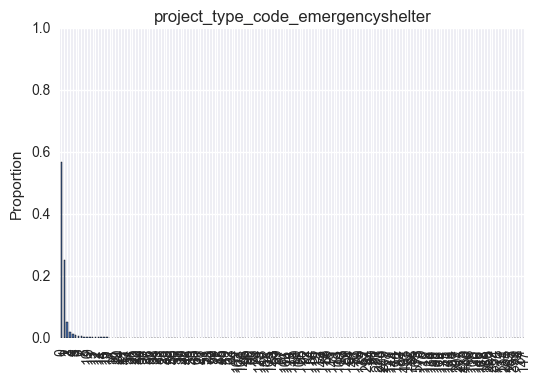

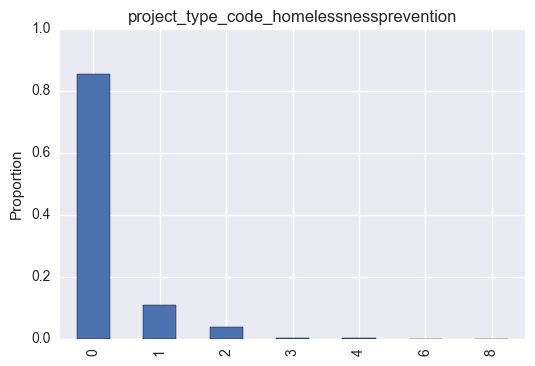

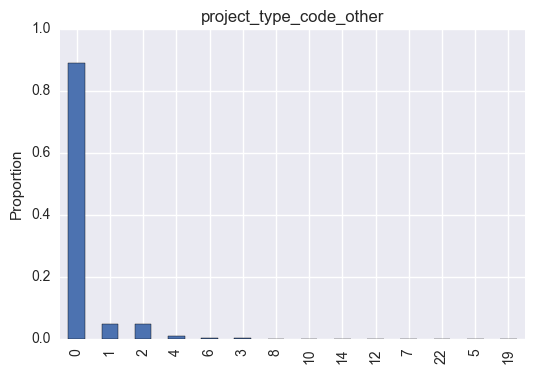

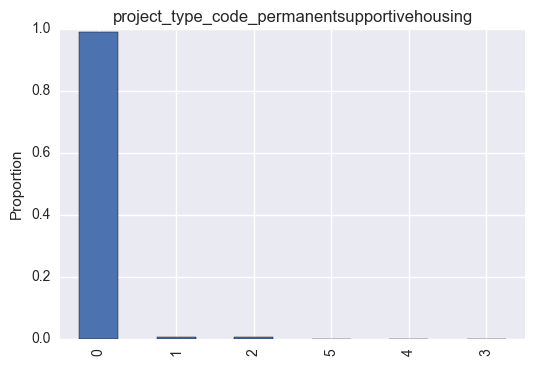

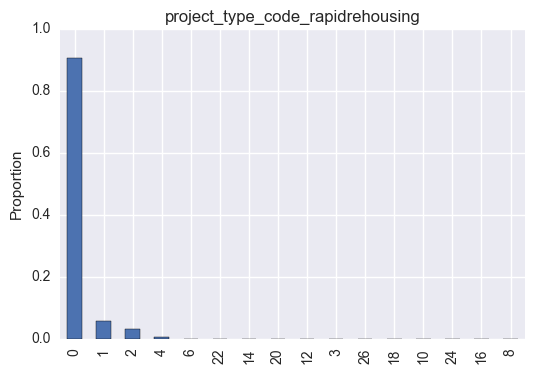

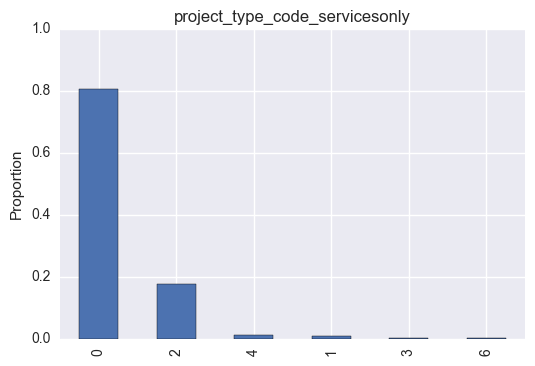

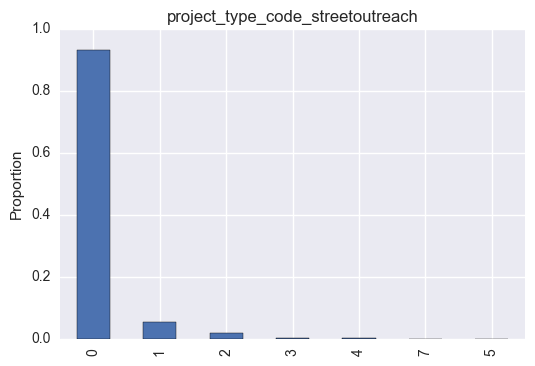

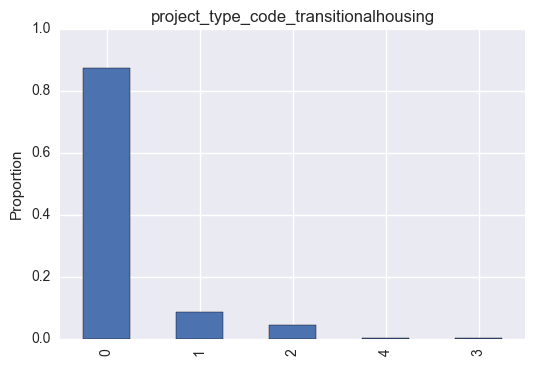

In [14]:
for i in range(len(Projects)):
    fig, ax = plt.subplots(figsize=(6, 4))
    col =  Projects[i]
    (df_features[col].value_counts() / df_features[col].value_counts().sum()).plot(ax=ax, kind='bar');
    ax.set(ylabel='Proportion', ylim=(0, 1), title=col);

In [15]:
# look into prevention only, serviceonly, and the combination

In [16]:
serv_and_prevent = df_features[( df_features['project_type_code_homelessnessprevention'] & df_features['project_type_code_servicesonly']) > 0]

In [17]:
serv_and_prevent.fillna(0,inplace = True)

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
import ml_insights as mli
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve

rfc = LogisticRegression()

# serv_and_prevent.dropna(inplace=True,axis =1)

for p in Projects:
    
    print('name of program: '+ p )
    thing = serv_and_prevent.iloc[:,serv_and_prevent.columns == p] > 0
    program_split = serv_and_prevent[thing.values]
    features = program_split.iloc[:,program_split.columns != 'in_permanent_housing']
    target = program_split['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict_proba(X_test)[:,1]
#     prec, rec, thresh = precision_recall_curve(y_test,y_pred)
#     thresh = list(thresh)
#     thresh.append(1)
#     plt.plot(rec,prec,label = p)
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.title('prec-rec')
#     plt.ylabel('prec')
#     plt.xlabel('rec')
#     plt.legend()
    fpr, tpr, thresh_ =  roc_curve(y_test,y_pred)
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title('ROC')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    odds = np.exp(rfc.coef_[0])*np.sign(rfc.coef_[0])
    sorted_index = odds.argsort()
    fig, ax = plt.subplots(figsize=(6, 11))  
    width = 0.75 # the width of the bars 
    ind = np.arange(X_test.shape[1])  # the x locations for the groups
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(X_test.columns[sorted_index])
    ax.barh(ind, odds[sorted_index], color="blue")
    plt.title('Odds Ratio w/ sign for each feature')
    plt.show()
    print('_______________________________________________________________________')
    print(' ')

name of program: project_type_code_emergencyshelter


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 94)) while a minimum of 1 is required.

In [ ]:
df_features[( df_features['project_type_code_homelessnessprevention'] & df_features['project_type_code_servicesonly']) >  0] 

# _______________________________________________________________________________________

## For each project, count the number of unique people in the project. Maybe just focus on visualization and less on prediction.

In [ ]:
# find people in one versus the people in multiple program
# model project types
# comparing the odds between the people
#two models A/B services/programs interaction effects

# make feature combining to make a model

# segment by groups

#split by group a and group b then by a third group that overlap
# look at the odds of whether or there improvements in 

In [25]:
df_features.dropna(axis=1,inplace=True)

name of program: project_type_code_emergencyshelter


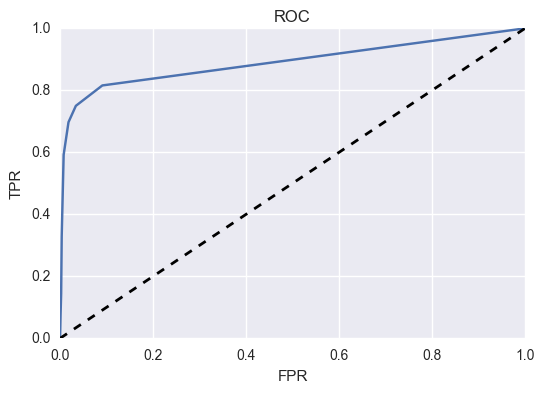

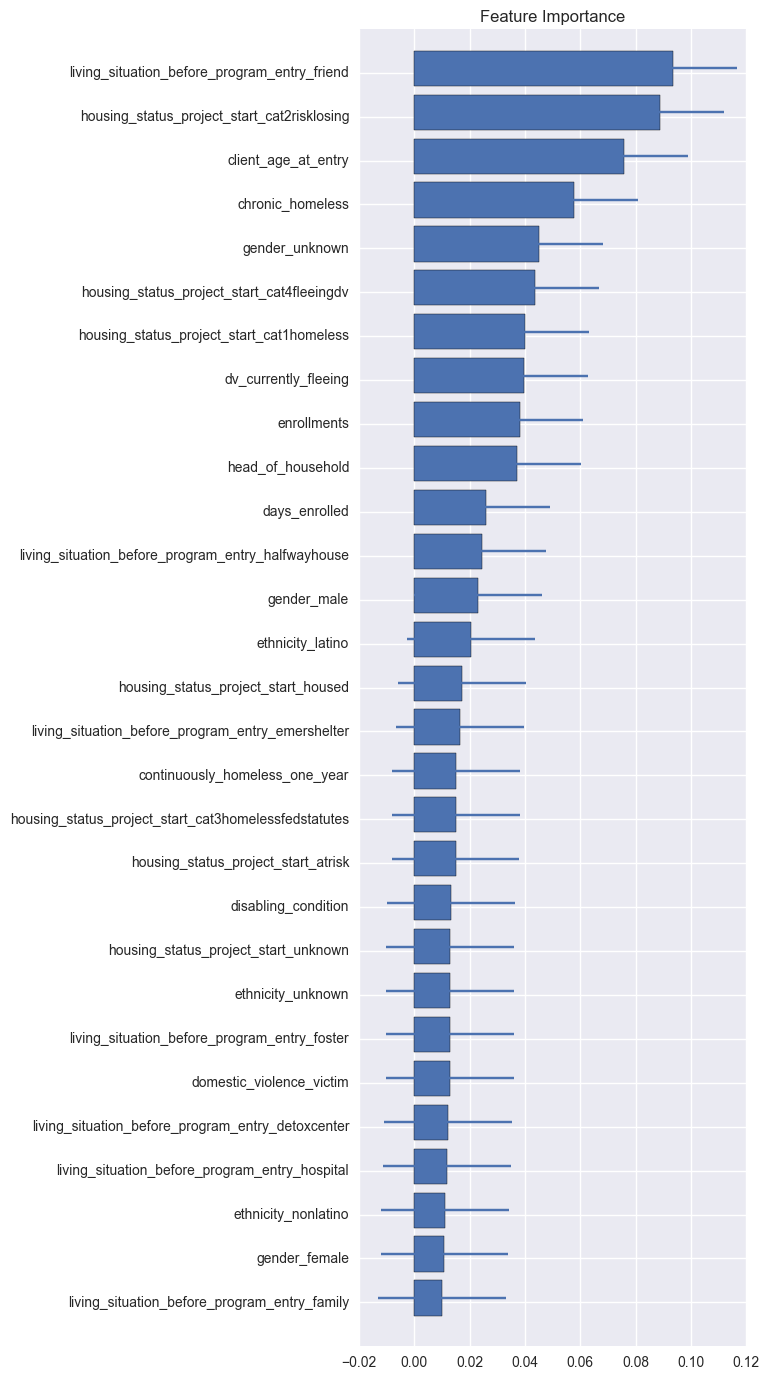

_______________________________________________________________________________
name of program: project_type_code_homelessnessprevention


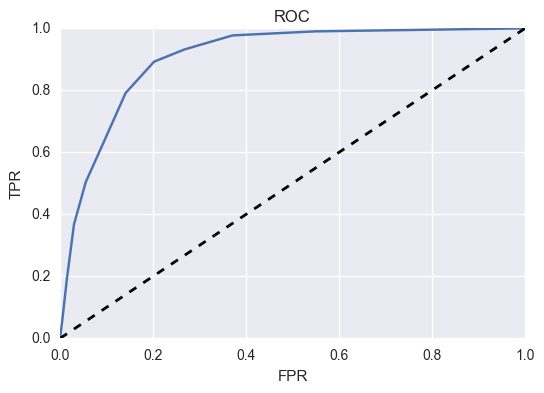

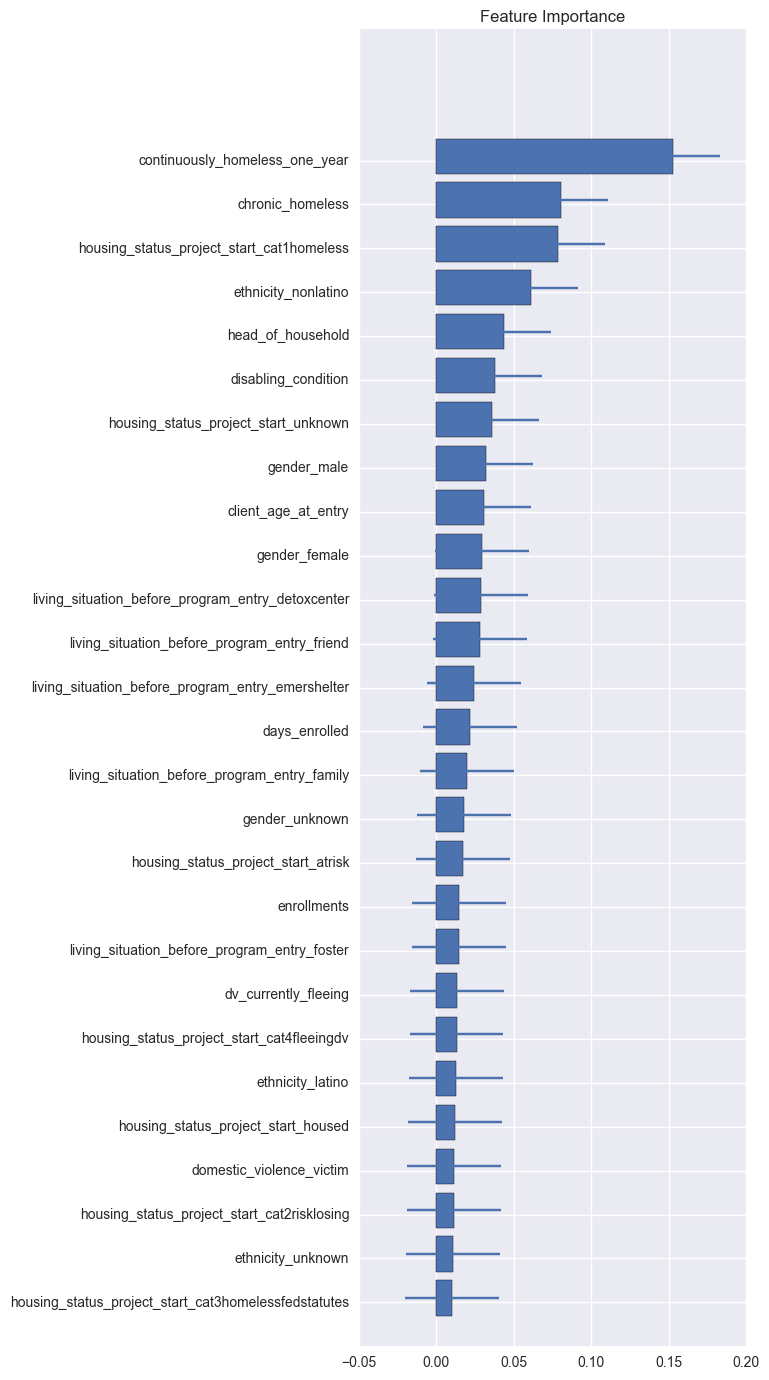

_______________________________________________________________________________
name of program: project_type_code_other


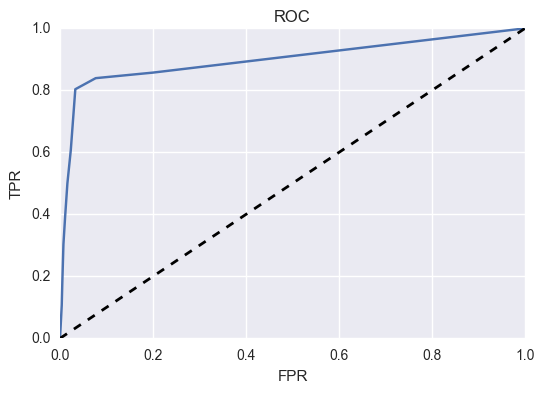

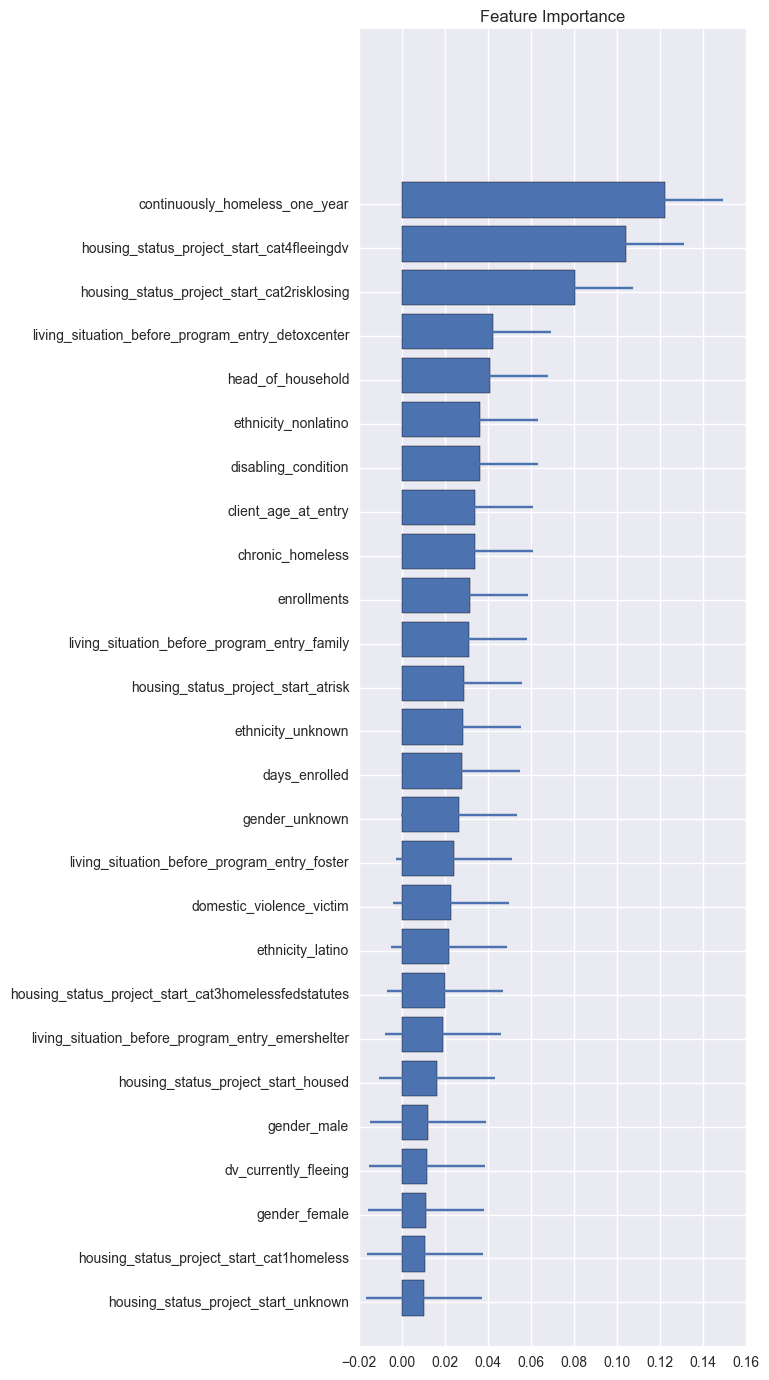

_______________________________________________________________________________
name of program: project_type_code_permanentsupportivehousing


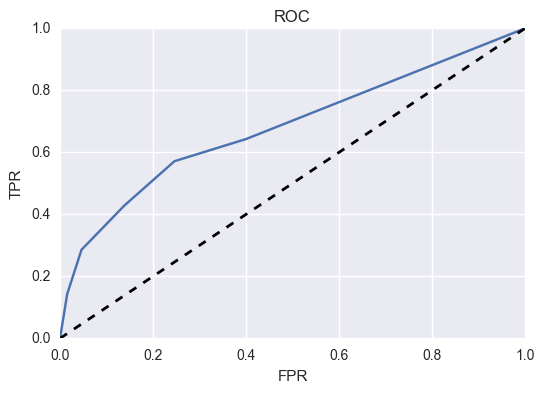

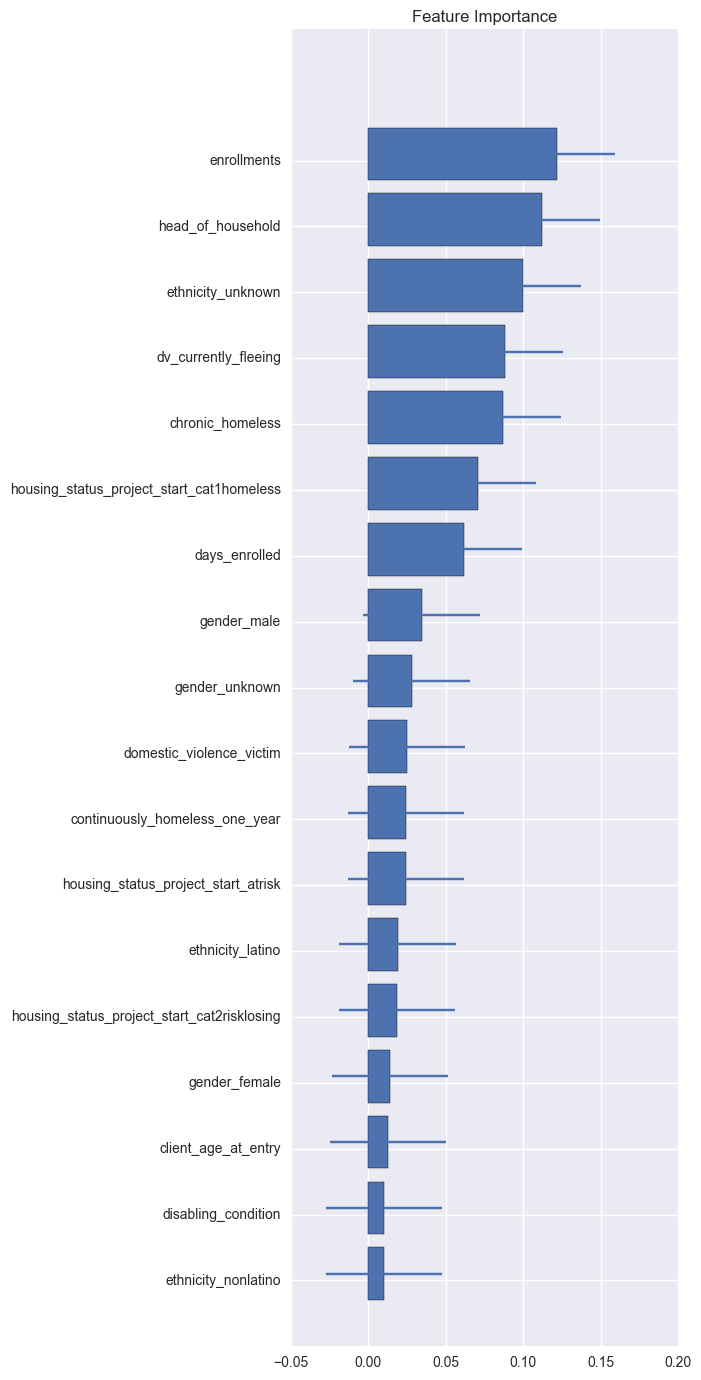

_______________________________________________________________________________
name of program: project_type_code_rapidrehousing


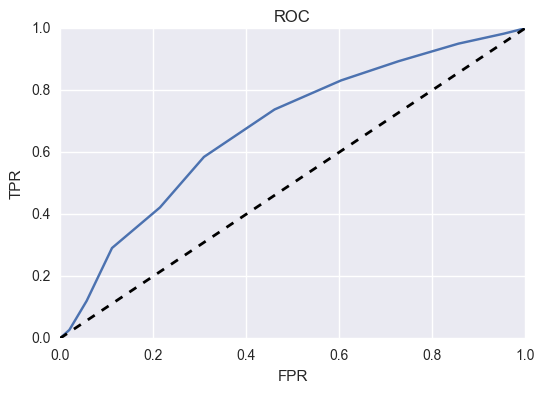

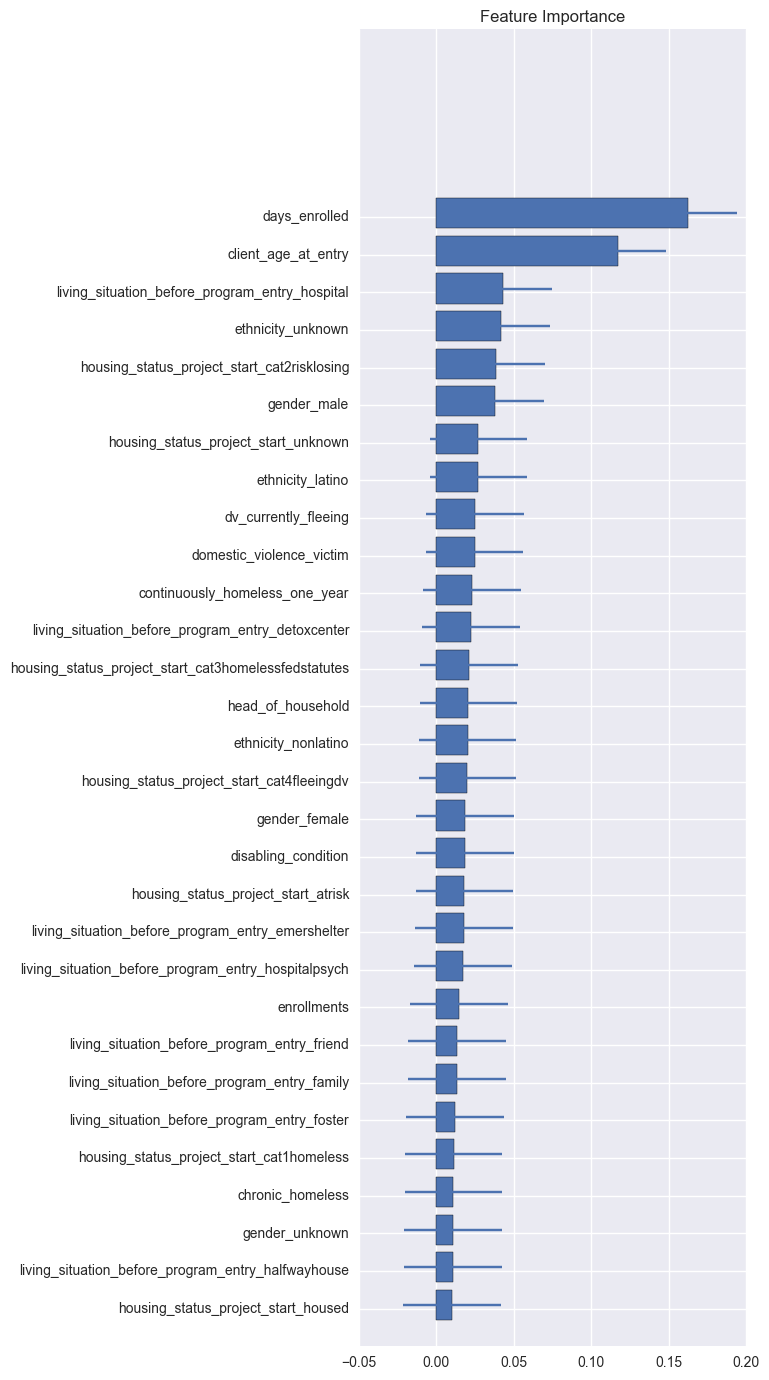

_______________________________________________________________________________
name of program: project_type_code_servicesonly


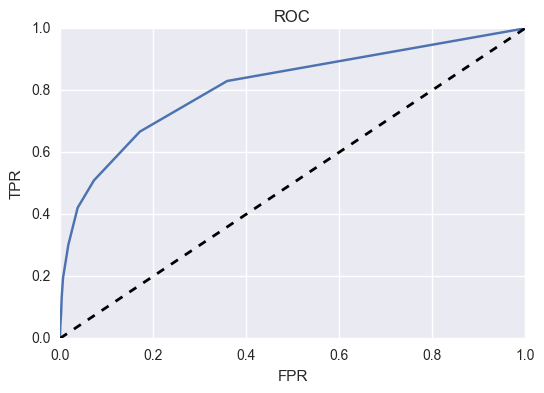

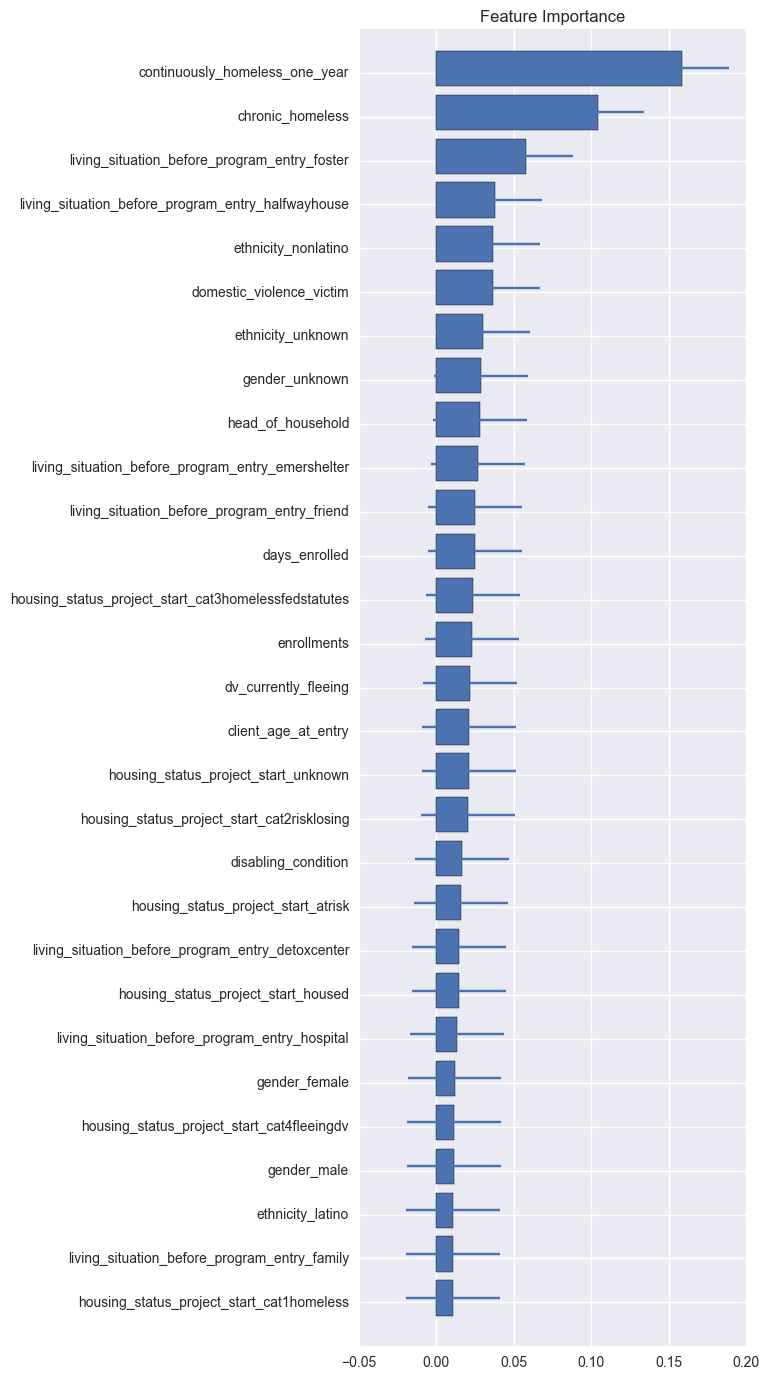

_______________________________________________________________________________
name of program: project_type_code_streetoutreach


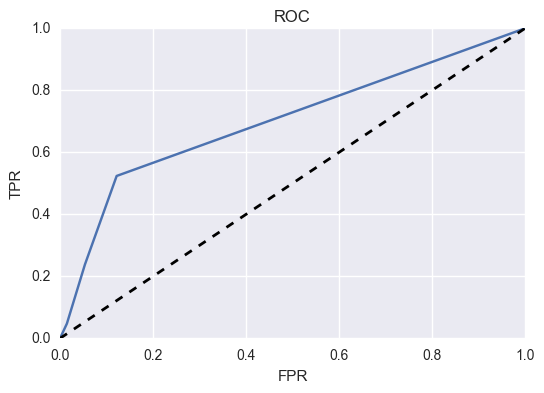

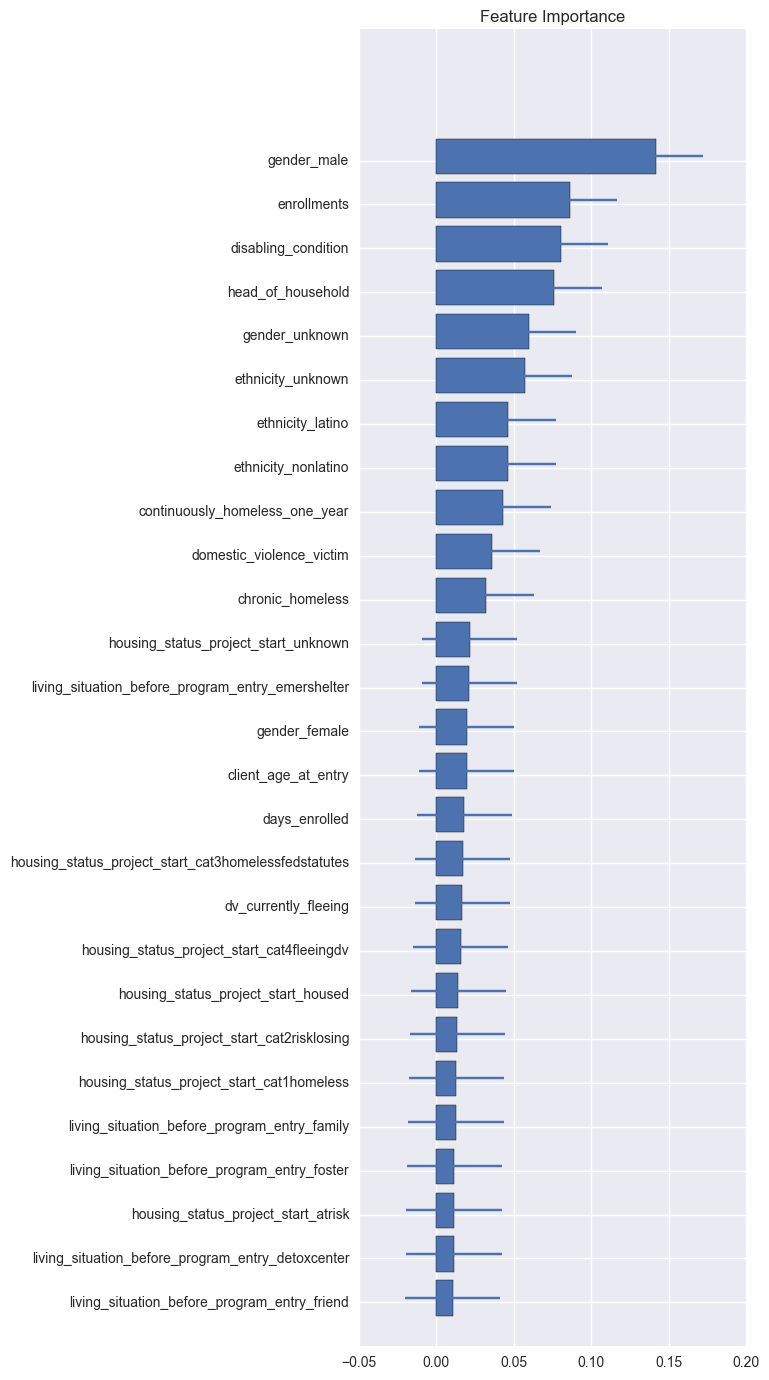

_______________________________________________________________________________
name of program: project_type_code_transitionalhousing


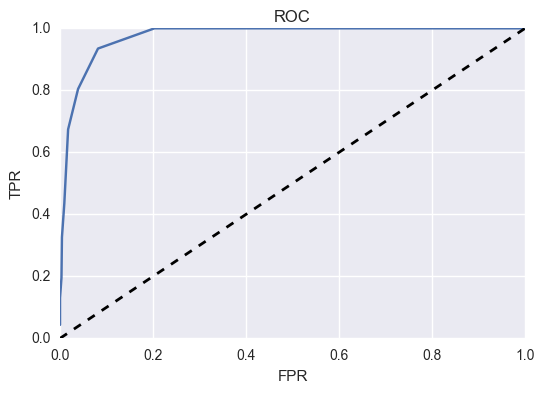

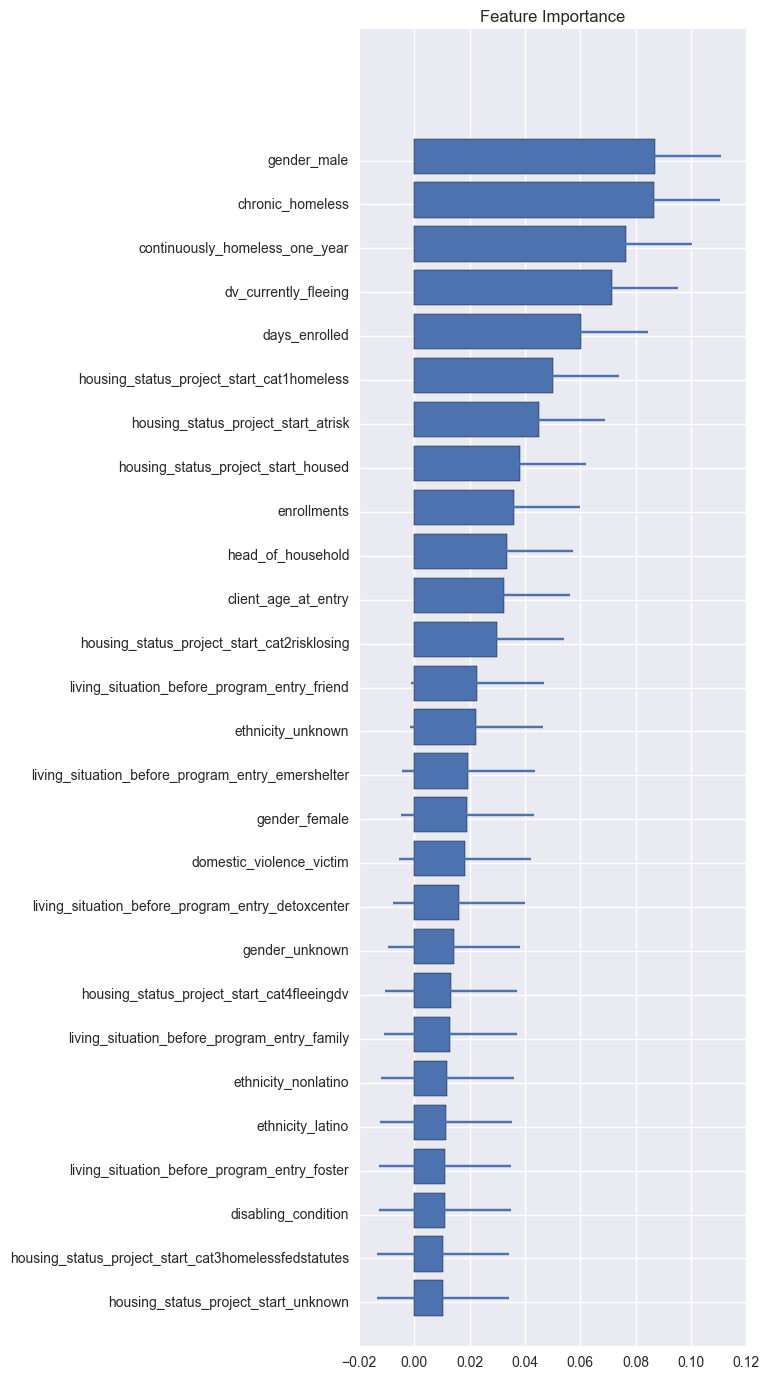

_______________________________________________________________________________


In [26]:
import ml_insights as mli
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
rfc = RandomForestClassifier()
for p in Projects:
    print('name of program: '+p)
    thing = df_features.iloc[:,df_features.columns == p] > 0
    program_split = df_features[thing.values]
    features = program_split.iloc[:,program_split.columns != 'in_permanent_housing']
    target = program_split['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict_proba(X_test)[:,1]
#     prec, rec, thresh = precision_recall_curve(y_test,y_pred)
#     thresh = list(thresh)
#     thresh.append(1)
#     plt.plot(rec,prec,label = p)
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.title('prec-rec')
#     plt.ylabel('prec')
#     plt.xlabel('rec')
#     plt.legend()
    fpr, tpr, thresh_ =  roc_curve(y_test,y_pred)
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title('ROC')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    
    sort_index = np.argsort(rfc.feature_importances_[rfc.feature_importances_>0.01])
    importances = rfc.feature_importances_[rfc.feature_importances_>0.01]
    sort_importances = importances[sort_index]
    std = np.std(sort_importances)
    fig, ax = plt.subplots(figsize =(5,17))
    ind = np.array(range(len(X_test.columns[sort_index])))+.7
    plt.barh(ind,sort_importances,xerr = std);
    ax.set_yticks(ind + .3);
    ax.set_yticklabels((X_test.columns[sort_index]))
    plt.title('Feature Importance')
    plt.show()
    print('_______________________________________________________________________________')

In [29]:
len(odds[odds.argsort()])

90

name of program: project_type_code_emergencyshelter


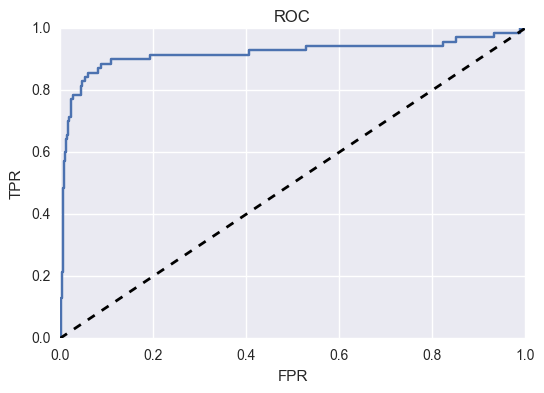

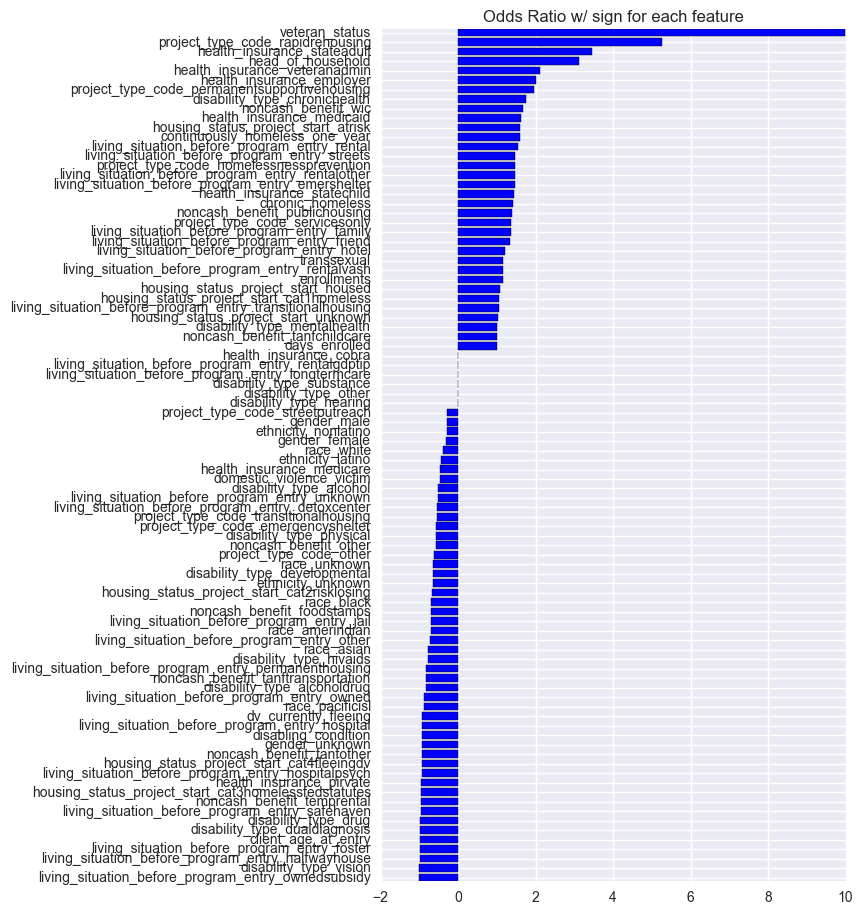

_______________________________________________________________________
 
name of program: project_type_code_homelessnessprevention


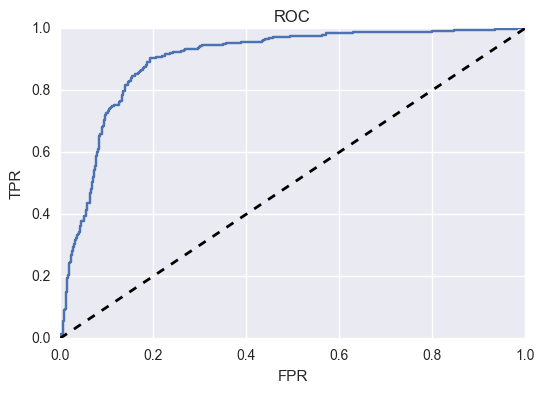

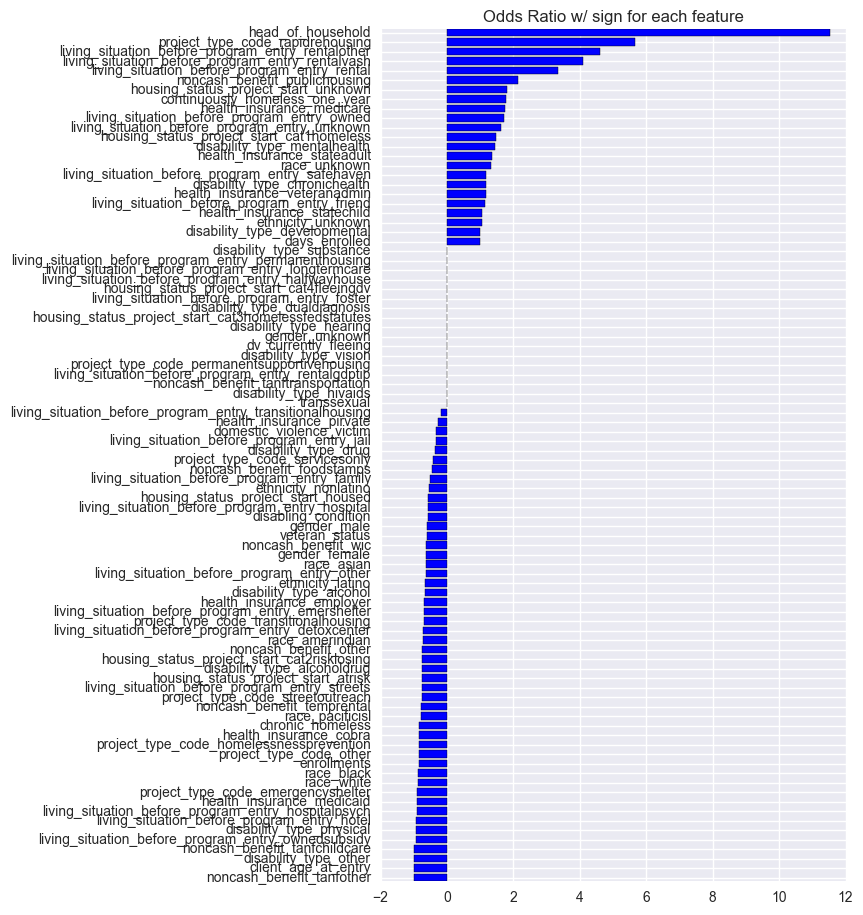

_______________________________________________________________________
 
name of program: project_type_code_other


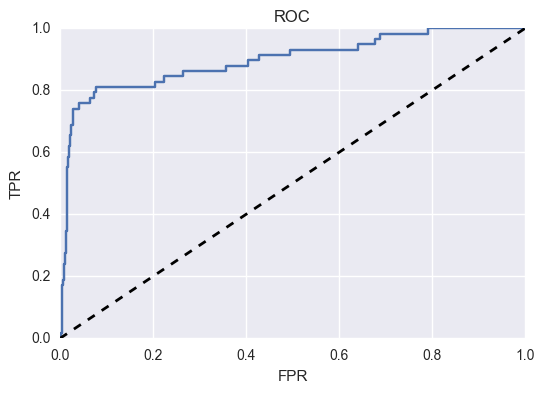

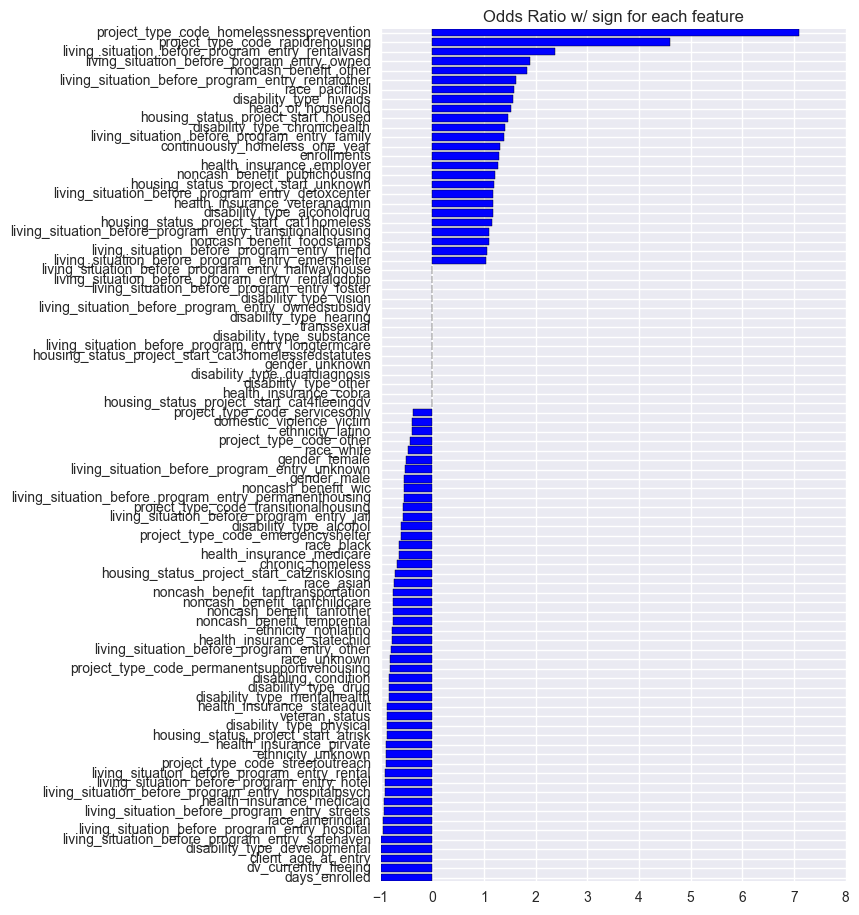

_______________________________________________________________________
 
name of program: project_type_code_permanentsupportivehousing


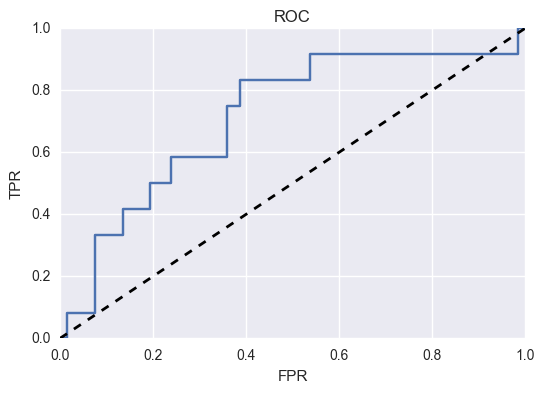

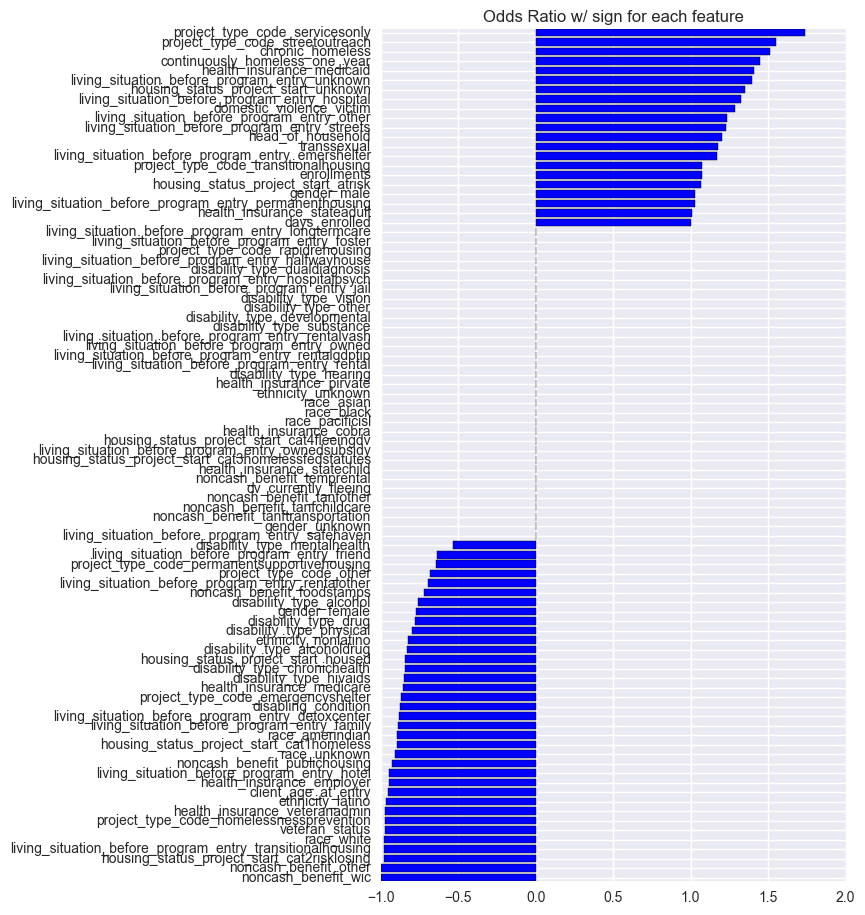

_______________________________________________________________________
 
name of program: project_type_code_rapidrehousing


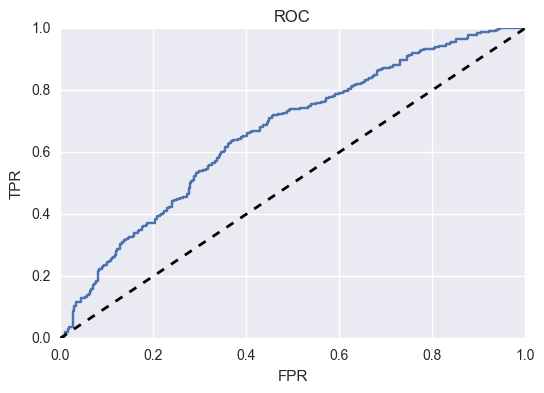

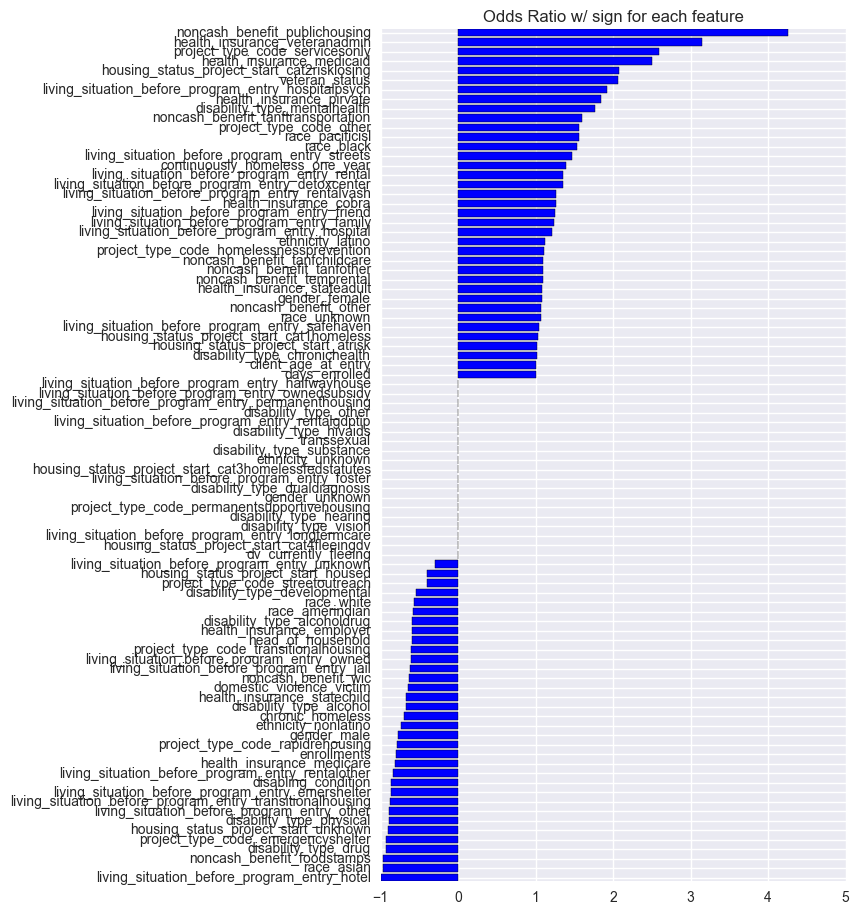

_______________________________________________________________________
 
name of program: project_type_code_servicesonly


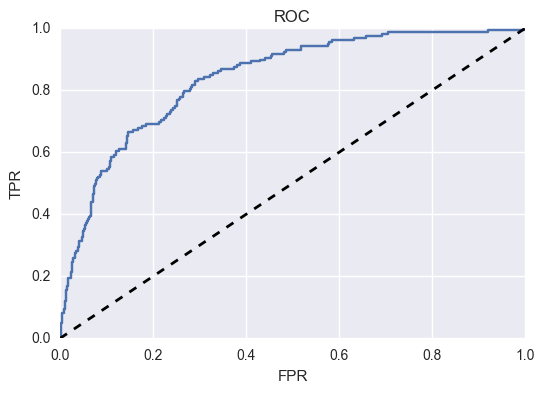

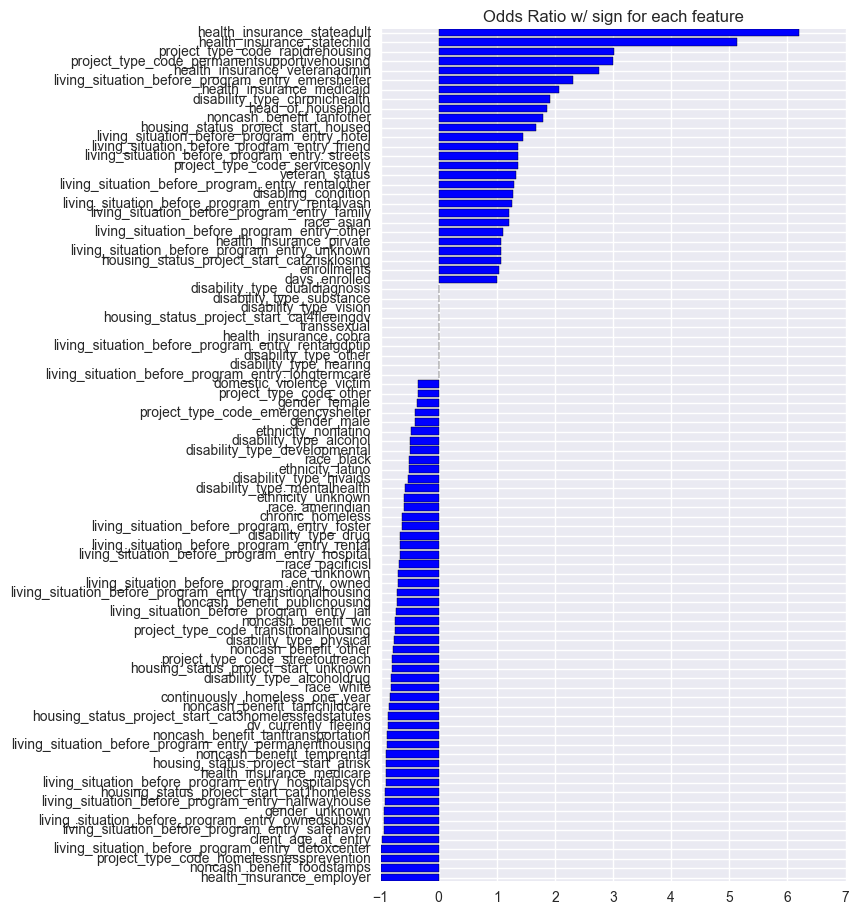

_______________________________________________________________________
 
name of program: project_type_code_streetoutreach


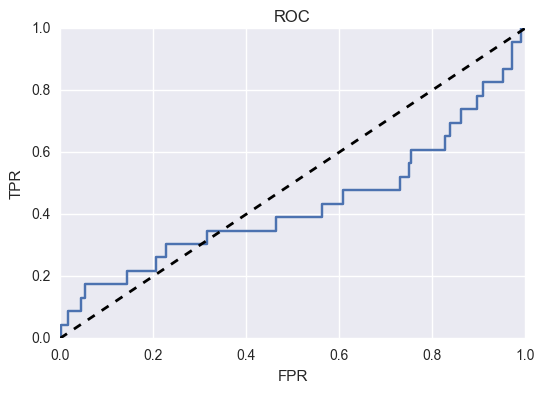

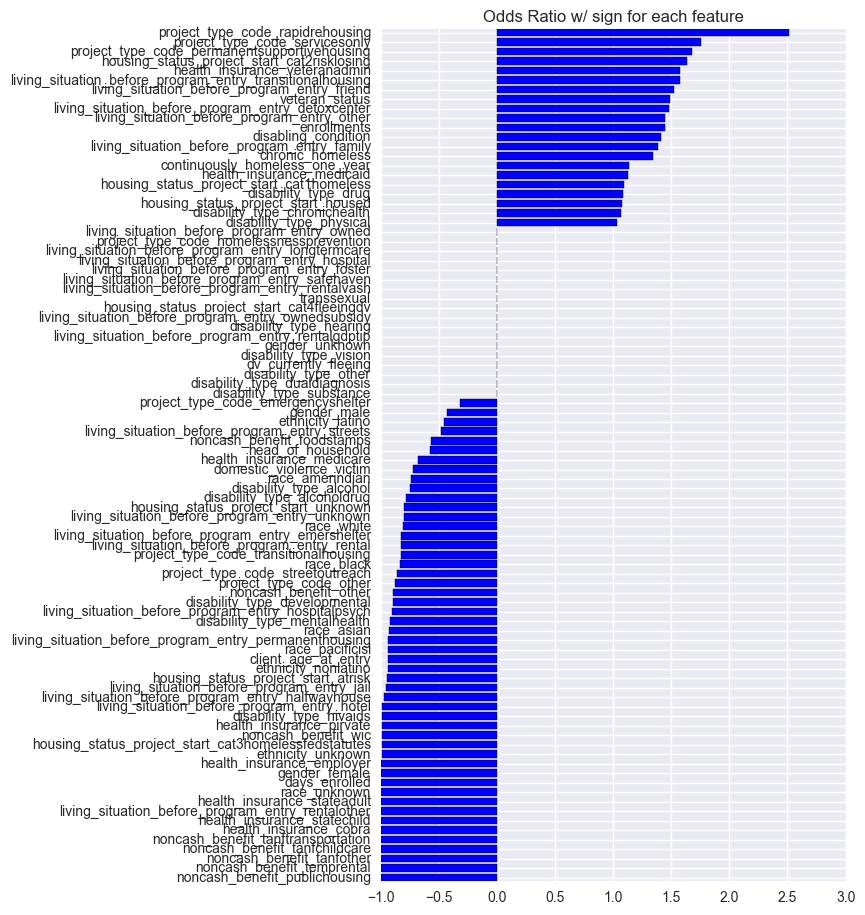

_______________________________________________________________________
 
name of program: project_type_code_transitionalhousing


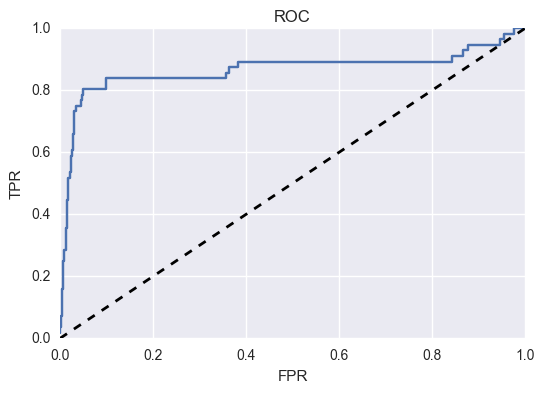

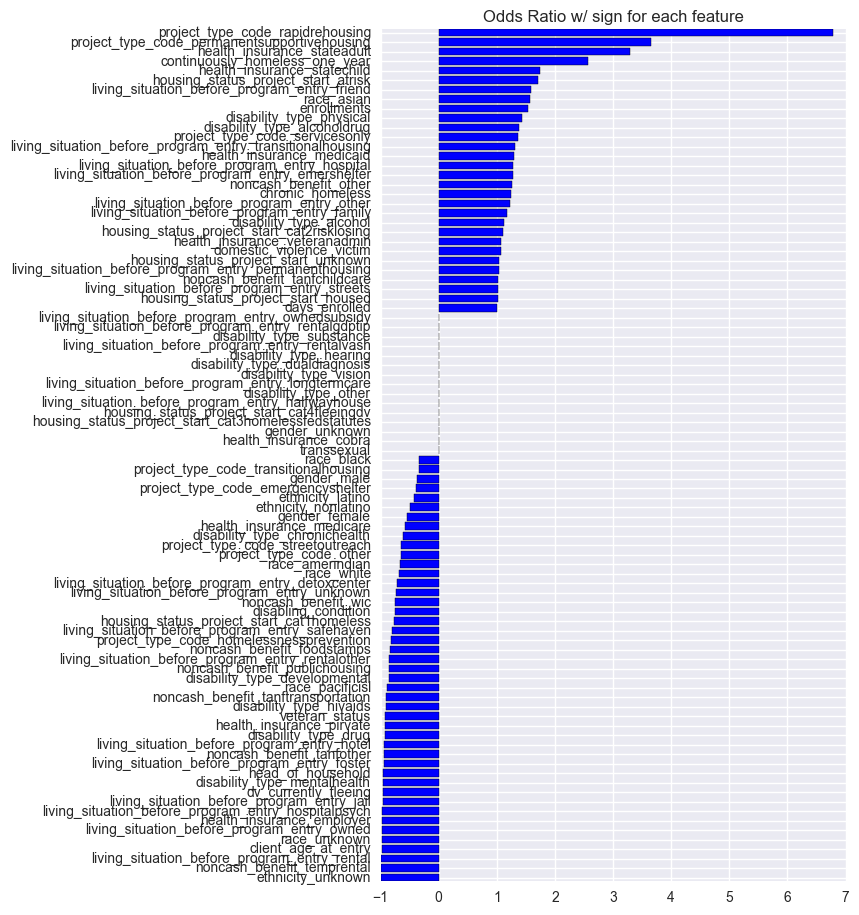

_______________________________________________________________________
 


In [28]:
import ml_insights as mli
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
rfc = LogisticRegression()
for p in Projects:
    print('name of program: '+ p )
    thing = df_features.iloc[:,df_features.columns == p] > 0
    program_split = df_features[thing.values]
    features = program_split.iloc[:,program_split.columns != 'in_permanent_housing']
    target = program_split['in_permanent_housing']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.70)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict_proba(X_test)[:,1]
#     prec, rec, thresh = precision_recall_curve(y_test,y_pred)
#     thresh = list(thresh)
#     thresh.append(1)
#     plt.plot(rec,prec,label = p)
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.title('prec-rec')
#     plt.ylabel('prec')
#     plt.xlabel('rec')
#     plt.legend()
    fpr, tpr, thresh_ =  roc_curve(y_test,y_pred)
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title('ROC')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    odds = np.exp(rfc.coef_[0])*np.sign(rfc.coef_[0])
    sorted_index = odds.argsort()
    fig, ax = plt.subplots(figsize=(6, 11))  
    width = 0.75 # the width of the bars 
    ind = np.arange(X_test.shape[1])  # the x locations for the groups
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(X_test.columns[sorted_index])
    ax.barh(ind, odds[sorted_index], color="blue")
    plt.title('Odds Ratio w/ sign for each feature')
    plt.show()
    print('_______________________________________________________________________')
    print(' ')

Odd Ratio = 1 Treatment doesn’t affect the odds of outcome  
Odd Ratio ≥≥1 Treatment increases the odd of outcome  
Odd Ratio ≤≤1 Treatment decreases the odd of outcome  

In [ ]:
ls

In [30]:
df_2 = pd.read_csv('../processed/homeless_row_per_enrollment_one_hot_encode.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df_2.shape

(58209, 91)

In [32]:
df_2.columns

Index([u'Personal ID', u'veteran_status', u'client_age_at_entry',
       u'entry_date', u'exit_date', u'disabling_condition',
       u'continuously_homeless_one_year', u'times_homeless_past_three_years',
       u'months_homeless_this_time', u'chronic_homeless',
       u'in_permanent_housing', u'residential_move_in_date',
       u'domestic_violence_victim', u'months_ago_dv_occurred',
       u'dv_currently_fleeing', u'days_enrolled',
       u'days_to_residential_move_in', u'head_of_household', u'race_other',
       u'race_pacificisl', u'race_black', u'race_asian', u'race_unknown',
       u'race_amerindian', u'race_white', u'ethnicity_nonlatino',
       u'ethnicity_unknown', u'ethnicity_latino', u'gender_transftom',
       u'gender_transmtof', u'gender_male', u'gender_female', u'gender_other',
       u'gender_unknown', u'housing_status_project_start_cat4fleeingdv',
       u'housing_status_project_start_unknown',
       u'housing_status_project_start_cat1homeless',
       u'housing_status_

In [33]:
df_2.head()

,Personal ID,veteran_status,client_age_at_entry,entry_date,exit_date,disabling_condition,continuously_homeless_one_year,times_homeless_past_three_years,months_homeless_this_time,chronic_homeless,...,disability_type_physical,disability_type_chronichealth,project_type_code_emergencyshelter,project_type_code_other,project_type_code_streetoutreach,project_type_code_servicesonly,project_type_code_rapidrehousing,project_type_code_transitionalhousing,project_type_code_permanentsupportivehousing,project_type_code_homelessnessprevention
0,214224,False,60,2012-01-01,2013-09-08,True,False,NaN,NaN,False,...,1,0,0,0,0,0,0,1,0,0
1,194592,True,53,2012-01-02,2013-08-31,True,False,NaN,NaN,False,...,0,0,0,1,0,0,0,0,0,0
2,179384,False,50,2012-01-03,2016-01-28,False,False,NaN,NaN,False,...,0,0,0,0,0,1,0,0,0,0
3,183019,False,28,2012-01-03,2012-10-26,False,False,NaN,NaN,False,...,0,0,0,0,0,1,0,0,0,0
4,182885,False,48,2012-01-04,2013-05-02,False,False,NaN,NaN,False,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df_3 = pd.read_csv('../processed/homeless_3_projects_outcome.csv')

In [35]:
df_3.head()

,Personal ID,race,ethnicity,gender,veteran_status,project_entry_id,client_age_at_entry,entry_date,housing_status_project_start,project_1,project_2,project_3,in_permanent_housing
0,173781,White,Hispanic/Latino,Female,False,252608,34,2014-02-28,At-risk of homelessness,Street Outreach,Emergency Shelter,NaN,False
1,173782,White,Hispanic/Latino,Male,False,314084,10,2014-05-06,Category 1 - Homeless,Emergency Shelter,NaN,NaN,False
2,173783,White,Hispanic/Latino,Female,False,314085,12,2014-05-06,Category 1 - Homeless,Emergency Shelter,NaN,NaN,False
3,173803,White,Hispanic/Latino,Female,False,201286,32,2013-02-08,Category 1 - Homeless,Emergency Shelter,NaN,NaN,False
4,173804,White,Hispanic/Latino,Female,False,201288,11,2013-02-08,Category 1 - Homeless,Emergency Shelter,NaN,NaN,False


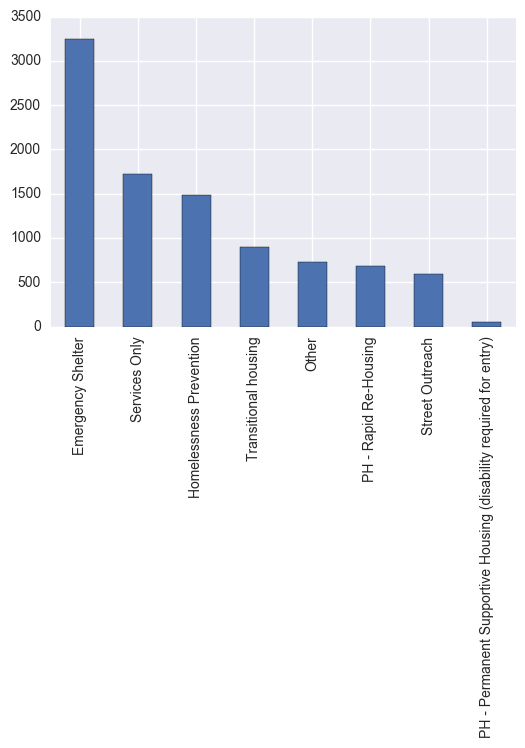

In [36]:
df_3['project_1'].value_counts().plot(kind='bar')

In [37]:
len(Projects)

8

In [38]:
cd datasci-sf-homeless-project/

[Errno 2] No such file or directory: 'datasci-sf-homeless-project/'
/Users/X/ds/datasci-sf-homeless-project/notebooks


In [39]:
ls src/C4SF-datasci-homeless/raw

ls: src/C4SF-datasci-homeless/raw: No such file or directory


In [40]:
projects_df = pd.read_csv('/Users/X/ds/datasci-sf-homeless-project/src/C4SF-datasci-homeless/raw/Project.csv')

In [41]:
projects_df.head()

,Project Name,Project ID,Organization Name,CoC Code,Project Type Code,Method for Tracking ES Utilization,Address City,Address Postal Code,Funder,Grant Start Date,Grant End Date
0,MOSBE CHS - Elm House,2142.0,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93942,NaN,NaN,NaN
1,MOSBE CHS - Elm House,2142.0,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93955,NaN,NaN,NaN
2,MOSBE CHS - RHY - BCP ES,3417.0,MOSBE Community Human Services (CHS),CA-506,Emergency Shelter (HUD),NaN,Monterey,93942,NaN,NaN,NaN
3,MOSBE CHS - RHY - BCP ES,3417.0,MOSBE Community Human Services (CHS),CA-506,Emergency Shelter (HUD),NaN,Seaside,93955,NaN,NaN,NaN
4,MOSBE CHS - RHY - BCP - HP,3418.0,MOSBE Community Human Services (CHS),CA-506,Homelessness Prevention (HUD),NaN,Monterey,93942,NaN,NaN,NaN


In [42]:
services = pd.read_csv('/Users/X/ds/datasci-sf-homeless-project/src/C4SF-datasci-homeless/raw/Service.csv')

In [43]:
services.head()

,Personal ID,Services ID,Date Provided,Date Ended,Service Code,Description,Project ID,Record Type,Contact Location,Project Entry ID
0,239791.0,7136970,3/31/2013,4/1/2013,BH-1800,Emergency Shelter,2947.0,Bed Night,NaN,NaN
1,175155.0,7312345,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,382789.0
2,180665.0,7312348,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,382791.0
3,184317.0,7312343,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,382790.0
4,184431.0,7312350,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,483580.0


In [71]:
df_features.shape

(11362, 91)

In [44]:
serv_proj = pd.merge(services,projects_df,how = 'inner', on='Project ID')

In [69]:
len(serv_proj['Personal ID'])

70414

In [66]:
len(set(serv_proj['Personal ID']))

13947

In [46]:
serv_proj['Record Type'].value_counts()

Bed Night    37286
Contact       1399
Name: Record Type, dtype: int64

In [47]:
income_entry_exit = pd.read_csv('/Users/X/ds/datasci-sf-homeless-project/src/C4SF-datasci-homeless/raw/Income Entry & Exit.csv')

In [48]:
incomes = income_entry_exit['Exit Total Income'].str.replace('$','').str.replace(',','').astype('float').replace(np.NaN,0)

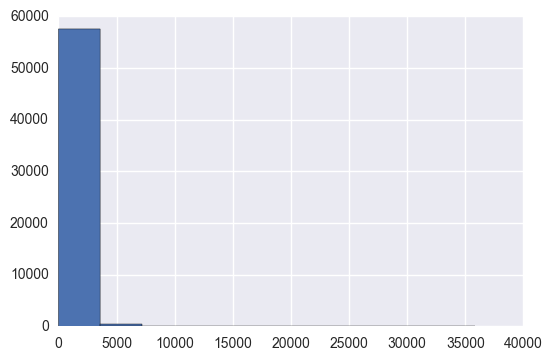

In [49]:
incomes.hist(bins = 10)

In [50]:
np.round(np.mean(incomes),4)

396.9588

In [51]:
## well this oculd be all wrong...

In [52]:
disa = pd.read_csv('../src/C4SF-datasci-homeless/raw/Disability.csv')  

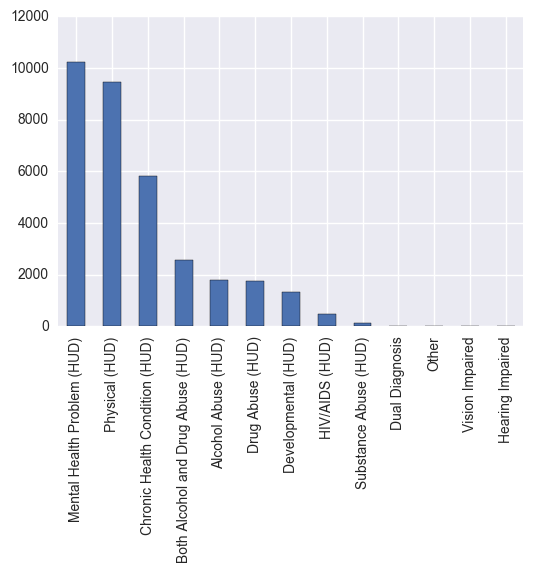

In [53]:
disa['Disability Type'].value_counts().plot(kind = 'bar')

In [54]:
pd.read_csv('/Users/X/ds/datasci-sf-homeless-project/src/C4SF-datasci-homeless/raw/Client.csv').head()

,Personal ID,Name Data Quality,SSN Data Quality,Race,Ethnicity,Gender,Veteran Status,Theater of Operations,Year Entered Military Service,Year Separated from Military Service,Military Branch,Discharge Status
0,173781.0,NaN,Full SSN Reported (HUD),White (HUD),Hispanic/Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN
1,173782.0,NaN,Full SSN Reported (HUD),White (HUD),Hispanic/Latino (HUD),Male,No (HUD),NaN,NaN,NaN,NaN,NaN
2,173783.0,NaN,NaN,White (HUD),Hispanic/Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN
3,173800.0,NaN,Full SSN Reported (HUD),Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN
4,173803.0,NaN,Full SSN Reported (HUD),White (HUD),Hispanic/Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN


In [55]:
# adopt a homeless person
# uber rides a year for $0.10 donation...so up the price for the rides to donate.
# number of homeless people in sf, santa cruz...

In [56]:
years_started = pd.to_datetime(services['Date Provided']).apply(lambda x: x.year)
years_ended = pd.to_datetime(services['Date Ended']).apply(lambda x: x.year)

In [57]:
years_started.value_counts()/len(years_started) * 100

2014.0    18.539806
2015.0    18.179533
2016.0    16.076545
2013.0    10.605426
2012.0     0.001676
1965.0     0.001676
Name: Date Provided, dtype: float64

In [58]:
years_ended.value_counts()/len(years_ended) * 100

2015.0    18.087370
2014.0    17.834342
2016.0    16.168708
2013.0    10.209964
2018.0     0.001676
Name: Date Ended, dtype: float64

In [59]:
diff_year =  years_ended - years_started

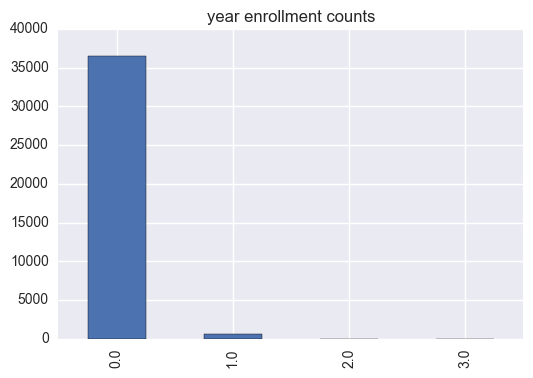

In [60]:
diff_year.value_counts().plot(kind = 'bar',title = 'year enrollment counts')

In [72]:
enrollments_df = pd.read_csv('/Users/X/ds/datasci-sf-homeless-project/src/C4SF-datasci-homeless/raw/Enrollment.csv')

In [73]:
enrollments_df.head()

,Personal ID,Project Entry ID,Client Age at Entry,Last Permanent Zip,Project Entry Date Updated,Destination,Entry Date,Exit Date,Project ID,Housing Status @ Project Start,...,Continuously Homeless One Year,"If Yes for ""Client entering from streets, ES or SH"" Approximate date started:",Times Homeless Past Three Years,Months Homeless This Time,Chronic Homeless,In Permanent Housing,Residential Move In Date,Domestic Violence Victim,DV When Occurred,DV Currently Fleeing
0,173781.0,252608.0,34.0,93907,1/23/2015,Other (HUD),2/28/2014,2/28/2014,2104.0,At-risk of homelessness (HUD),...,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN
1,173781.0,314080.0,35.0,93907,1/12/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101.0,Category 1 - Homeless (HUD),...,No (HUD),NaN,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
2,173782.0,122915.0,1.0,NaN,12/30/2004,NaN,11/29/2004,NaN,2114.0,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,173782.0,314084.0,10.0,93905,1/7/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101.0,Category 1 - Homeless (HUD),...,Yes (HUD),4/6/2014,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
4,173783.0,122916.0,2.0,NaN,12/30/2004,NaN,11/29/2004,NaN,2114.0,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [78]:
enrollments_df['In Permanent Housing'].value_counts()

No     4205
Yes    1823
Name: In Permanent Housing, dtype: int64

In [62]:
cd ..

/Users/X/ds/datasci-sf-homeless-project


In [63]:
ls

README.md              index.html             sfHomelessData.js
SentimentAnalysis.jpg  notebooks/             sfhomelesstweets.csv
bower_components/      processed/             src/
clean.py               reports/               style.css
datasciheader.png      scatter.js


In [ ]:
#there's an optimal amount of time where they become independent
# Feature, 
# do just one project where the user was only in that one project

# OR look at where the users overlap 

# get combinations as features and look at the top counts in the new feature